<a href="https://colab.research.google.com/github/befragment/misis_ml/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этом домашнем задании вам предстоит с помощью Pandas ответить на несколько вопросов об этом [датасете](https://archive.ics.uci.edu/ml/datasets/Adult). Все ответы вам предстоит отправить в этой [форме](https://forms.gle/qfVth9BygS4AVJZ47)

Чтобы начать надо сохранить этот ноутбук себе на диск (File - Save a copy in Drive) или скачать (File - Download), если вы делаете у себя локально. 

Скачать нужный датасет можно [тут](https://disk.yandex.ru/d/6WlIXR-y_PObLg)

Эта домашняя работа легкая и покрывает лишь некоторую базу, очень советую пройтись по доп.материалам и посмотреть на различные крутые штуки, которые может делать Pandas, Matplotlib или Seaborn. Особенно если вы хотите заниматься анализом данных намного серьезнее.

Мягкий дедлайн: 31 октября 23:59 \
Жесткий дедлайн: 7 ноября 23:59

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (18, 10)

**Задание 0: Прочитайте скачанный датасет и выведите его**

In [ ]:
# Write code here
df = pd.read_csv('/content/sample_data/adult_data.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Задание 1: Найдите количество мужчин и количество женщин в датасете**

In [ ]:
# Write code here
gender = df['sex']
males = len([sex for sex in gender if sex == 'Male'])
females = len([sex for sex in gender if sex == 'Female'])
(males, females)

(21790, 10771)

**Задание 2: Найдите средний возраст мужчин**

In [ ]:
# Write code here
men = df.loc[df['sex'] == 'Male']
avg_men_age = np.mean([int(age) for age in men['age']])
avg_men_age

39.43354749885268

**Задание 3: Найдите процент людей, которые являются гражданами Тайваня (Taiwan)**

In [ ]:
# Write code here
taiwan_residents = df.loc[df['native-country'] == 'Taiwan']
(len(taiwan_residents) / len(df)) * 100  # percentage of Taiwan residents

0.1566290961579804

**Задание 4: Найдите среднее значение возраста для людей, которые зарабатывают >50K**

In [ ]:
# Write code here
wealthy = df.loc[df['salary'] == '>50K']
wealthy_ages = [int(age) for age in wealthy['age']]
np.mean(wealthy_ages)

44.24984058155847

**Задание 5: Найдите стандартное отклонение возраста для людей, которые зарабатывают >50K**

In [ ]:
# Write code here
wealthy.std()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


age                   10.519028
fnlwgt            102541.775472
education-num          2.385129
capital-gain       14570.378951
capital-loss         595.487574
hours-per-week        11.012971
dtype: float64

**Задание 6: Проверьте, правда ли что все люди, которые зарабытвают >50K, имеют образование Bachelors+**

In [ ]:
# Write code here
print('yes') if np.array(wealthy['education-num']).all() > 13 else ('no')

'no'

**Задание 7: Сколько человек, работающих 40 часов и являющихся гражданами США (United-States), зарабатывают <=50K**

In [ ]:
# Write code here
avg_us_citizen = df.loc[(df['hours-per-week'] == 40) & 
                        (df['native-country'] == 'United-States') & 
                        (df['salary'] == '<=50K')]
len(avg_us_citizen)


10493

**Задание 8: Теперь чуть сложнее. Давайте найдем максимальное количество часов в неделю (hours-per-week), а потом посмотрим, сколько человек работают столько времени в неделю и зарабатывают <=50K**

In [ ]:
# Write code here
max_hours_per_week = np.array(df['hours-per-week']).max()
rabotyagi = df.loc[df['hours-per-week'] == max_hours_per_week]
poor_rabotyagi = rabotyagi.loc[rabotyagi['salary'] == '<=50K']
max_hours_per_week, len(poor_rabotyagi)

(99, 60)

**Задание 9: В этом задании вам предстоит построить ваш первый график. Ответьте на вопрос: людей с каким образованием больше всего представленно в датасете? \
P.S Использовать можно matplotlib, seaborn, plotly**

<BarContainer object of 16 artists>

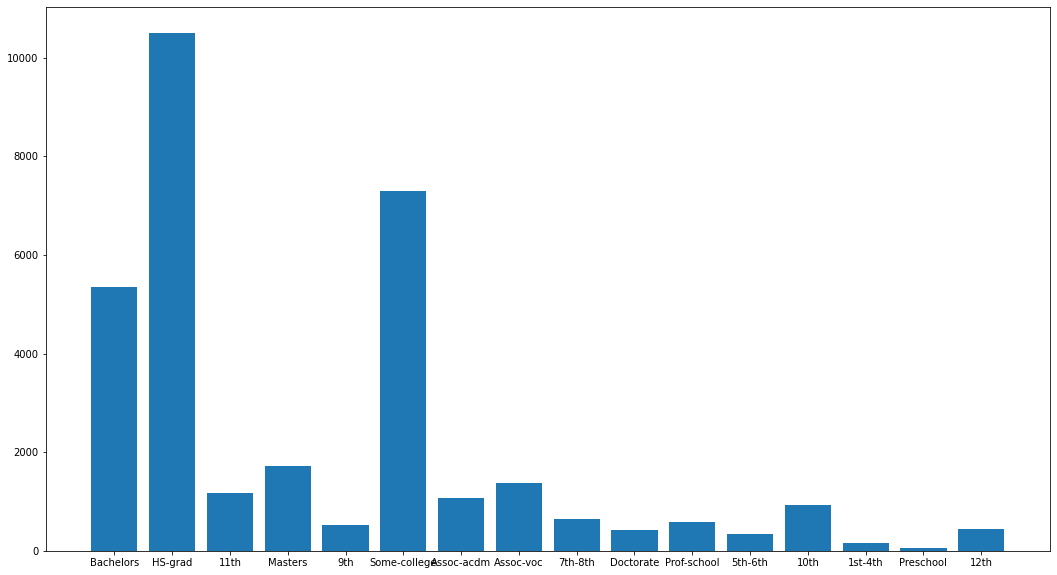

In [ ]:
# Write code here
d = dict()
edu = list(df['education'])
for el in range(len(edu)):
  if edu[el] not in d:
    d[edu[el]] = 1
  else:
    d[edu[el]] += 1

educations = [ed for ed in d.keys()]
counts = [x for x in d.values()]

plt.bar(educations, counts)

**Задание 10: А теперь давайте посмотрим на распределение возрастов. Сколько возрастных отрезков имеют больше 1600 значений? (Одним "отрезков" является один столбец при стандартных настройках seaborn/matplotlib) 
P.S. Необязательное задание, хотя лучше сделать, если собираетесь сдавать до мягкого, я хоты бы посмотрю**

In [ ]:
# Write code here
#???